In [52]:
import pandas as pd

In [53]:
import pandas as pd

# Correcting the function name and file path
df = pd.read_csv('/content/large_dataset_Diagnosis.csv')

# Displaying the first few rows of the dataframe
df.columns


Index(['ID', 'Age', 'Residence', 'Education Status', 'Occupation',
       'Socioeconomic status', 'BMI', 'Systolic blood Pressure',
       'Diastolic blood pressure', 'Gestational age (weeks)', 'Parity',
       'Dressing style', 'Sunlight exposure', 'Dairy productis consumption',
       'Multivitamin use', 'Season', 'Vitamin D status (ng/mL)',
       'Pregnancy loss', 'History of Pregnancy Loss',
       'Underlying Health Conditions', 'Physical Activity Level',
       'Dietary Habits', 'Family History of Pregnancy Complications',
       'Stress Level', 'Sleep Patterns', 'Exposure to Environmental Toxins'],
      dtype='object')

In [54]:
pip install -U scikit-learn


In [55]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [56]:
print(df.dtypes)

ID                                             int64
Age                                            int64
Residence                                     object
Education Status                              object
Occupation                                    object
Socioeconomic status                          object
BMI                                          float64
Systolic blood Pressure                      float64
Diastolic blood pressure                     float64
Gestational age (weeks)                        int64
Parity                                        object
Dressing style                                object
Sunlight exposure                             object
Dairy productis consumption                   object
Multivitamin use                              object
Season                                        object
Vitamin D status (ng/mL)                      object
Pregnancy loss                                object
History of Pregnancy Loss                     

Accuracy: 0.7980
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       798
           1       0.00      0.00      0.00       202

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.64      0.80      0.71      1000



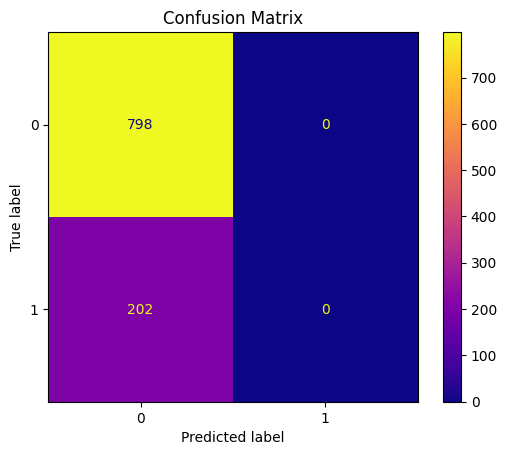

<Figure size 600x400 with 0 Axes>

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

# Ignore all warning messages
warnings.filterwarnings('ignore')

# Load your dataset
df = pd.read_csv('/content/large_dataset_Diagnosis.csv')

# Separate features and target, mapping 'Yes' to 1 and 'No' to 0 for 'Pregnancy loss'
X = df.drop(['Pregnancy loss'], axis=1)
y = df['Pregnancy loss'].map({'Yes': 1, 'No': 0})

# Identifying categorical and numerical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Defining the MLPClassifier model within a pipeline
layer_sizes = (120, 100, 90, 80, 70, 60, 50, 40, 30, 25, 20, 15, 10, 5, 3,1)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', MLPClassifier(hidden_layer_sizes=layer_sizes,
                                              max_iter=300,
                                              activation='relu',
                                              solver='adam',
                                              random_state=42))])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Training the model
clf.fit(X_train, y_train)

# Making predictions with the model
preds = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")

# Displaying a classification report
print("Classification Report:")
print(classification_report(y_test, preds))

# Generating and displaying a confusion matrix
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.plasma)
plt.title('Confusion Matrix')
plt.figure(figsize=(6,4))
plt.show()





In [67]:
!pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.3 MB/s eta 0:00:00


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define parameter space
param_dist = {
    'model__hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 75, 50)],
    'model__alpha': [0.0001, 0.001, 0.01, 0.1],
}

# Random search for hyperparameter optimization
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42)

# Execute search
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluating the best model
best_model = random_search.best_estimator_
preds = best_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END model__alpha=0.0001, model__hidden_layer_sizes=(50,); total time=   1.1s
[CV] END model__alpha=0.0001, model__hidden_layer_sizes=(50,); total time=   1.0s
[CV] END model__alpha=0.0001, model__hidden_layer_sizes=(50,); total time=   0.9s
[CV] END model__alpha=0.0001, model__hidden_layer_sizes=(100,); total time=   1.1s
[CV] END model__alpha=0.0001, model__hidden_layer_sizes=(100,); total time=   1.2s
[CV] END model__alpha=0.0001, model__hidden_layer_sizes=(100,); total time=   1.0s
[CV] END model__alpha=0.001, model__hidden_layer_sizes=(100,); total time=   1.1s
[CV] END model__alpha=0.001, model__hidden_layer_sizes=(100,); total time=   1.0s
[CV] END model__alpha=0.001, model__hidden_layer_sizes=(100,); total time=   1.2s
[CV] END model__alpha=0.1, model__hidden_layer_sizes=(100, 50); total time=   2.3s
[CV] END model__alpha=0.1, model__hidden_layer_sizes=(100, 50); total time=   2.2s
[CV] END model__alpha=0.1, model

In [72]:
# Simplified space focusing on alpha only
space = [Real(1e-6, 1e-1, name='mlpclassifier__alpha')]

@use_named_args(space)
def simplified_objective(**params):
    clf.set_params(**params)
    clf.fit(X_train, y_train)
    return -clf.score(X_test, y_test)

# Simplified optimization
res_gp_simple = gp_minimize(simplified_objective, space, n_calls=10, random_state=0)

print("Best parameters:", res_gp_simple.x)
print("Best accuracy:", -res_gp_simple.fun)


Best parameters: [0.08579470381665809]
Best accuracy: 0.7025


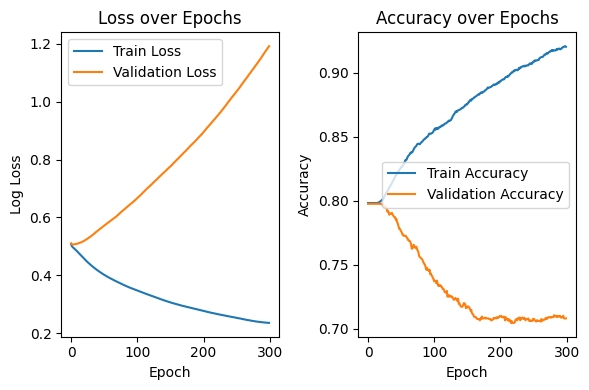

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import warnings

# Ignore all warning messages
warnings.filterwarnings('ignore')

# Load your dataset
df = pd.read_csv('/content/large_dataset_Diagnosis.csv')

# Separate features and target, mapping 'Yes' to 1 and 'No' to 0 for 'Pregnancy loss'
X = df.drop(['Pregnancy loss'], axis=1)
y = df['Pregnancy loss'].map({'Yes': 1, 'No': 0})

# Identifying categorical and numerical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initialize the model with warm_start=True to allow incremental learning
model = MLPClassifier(hidden_layer_sizes=(100,),
                      max_iter=1, warm_start=True, activation='relu', solver='adam', random_state=42)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Manually iterate through epochs
for epoch in range(300):
    clf.fit(X_train, y_train)

    # Predict on training and test set
    y_train_pred_proba = clf.predict_proba(X_train)
    y_test_pred_proba = clf.predict_proba(X_test)

    # Calculate loss
    train_loss = log_loss(y_train, y_train_pred_proba)
    test_loss = log_loss(y_test, y_test_pred_proba)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    # Append to lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting training and validation loss
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
